In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=15,
                                    width_shift_range=0.15,
                                    height_shift_range=0.15,
                                    shear_range=0.15,
                                    zoom_range=0.15,
                                    horizontal_flip=True,
                                  )
val_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
#Batch Size and Image Size
batch_sz = 64
sz = 48

train_generator = train_datagen.flow_from_directory('../input/fer-dsc-v3/final_data_v5/final_data_v5/Train',
                                                    batch_size = batch_sz,
                                                    class_mode='categorical',
                                                    target_size=(sz,sz))

val_generator = val_datagen.flow_from_directory('../input/fer-dsc-v3/final_data_v5/final_data_v5/Test',
                                                    batch_size = batch_sz,
                                                    class_mode='categorical',
                                                    target_size=(sz,sz))

Found 13651 images belonging to 4 classes.
Found 1649 images belonging to 4 classes.


In [4]:
'''class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.74):
#             if(logs.get('accuracy')>78):
                print("\nReached 74% val_accuracy, so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()'''

'class myCallback(tf.keras.callbacks.Callback):\n    def on_epoch_end(self, epoch, logs={}):\n        if(logs.get(\'val_accuracy\')>0.74):\n#             if(logs.get(\'accuracy\')>78):\n                print("\nReached 74% val_accuracy, so cancelling training!")\n                self.model.stop_training = True\ncallbacks = myCallback()'

In [5]:
from keras.applications.vgg16 import VGG16

In [6]:
pre_model = VGG16(include_top = False,
                 weights = 'imagenet',
                 input_shape = (48,48,3))

58892288/58889256 [==============================] - 0s 0us/step


In [7]:
for layer in pre_model.layers:
    layer.trainable=False

In [8]:
last_output = pre_model.get_layer('block5_conv1').output

In [9]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(128,activation= 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4,activation='softmax')(x)

In [10]:
model = tf.keras.Model(pre_model.input, x)

In [11]:
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-5)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_generator,
                   validation_data=val_generator,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                   validation_steps=val_generator.samples//val_generator.batch_size,
                    epochs=30
                    )

Epoch 1/30
213/213 [==============================] - 39s 181ms/step - loss: 1.9400 - accuracy: 0.2647 - val_loss: 1.3947 - val_accuracy: 0.3169
Epoch 2/30
213/213 [==============================] - 21s 97ms/step - loss: 1.5044 - accuracy: 0.2917 - val_loss: 1.3369 - val_accuracy: 0.3625
Epoch 3/30
213/213 [==============================] - 21s 96ms/step - loss: 1.4159 - accuracy: 0.3157 - val_loss: 1.3150 - val_accuracy: 0.3819
Epoch 4/30
213/213 [==============================] - 22s 102ms/step - loss: 1.3873 - accuracy: 0.3240 - val_loss: 1.3076 - val_accuracy: 0.3812
Epoch 5/30
213/213 [==============================] - 22s 101ms/step - loss: 1.3585 - accuracy: 0.3500 - val_loss: 1.2903 - val_accuracy: 0.4081
Epoch 6/30
213/213 [==============================] - 20s 96ms/step - loss: 1.3393 - accuracy: 0.3650 - val_loss: 1.2757 - val_accuracy: 0.4231
Epoch 7/30
213/213 [==============================] - 21s 99ms/step - loss: 1.3307 - accuracy: 0.3657 - val_loss: 1.2636 - val_accura

In [13]:
for layer in model.layers:
    layer.trainable = True


In [14]:
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      

In [15]:
opt1 = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(optimizer = opt1, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history1 = model.fit(train_generator,
                    validation_data = val_generator,
                    validation_steps = val_generator.samples // val_generator.batch_size,
                    epochs = 22)
                    #callbacks = [callbacks])

Epoch 1/22
214/214 [==============================] - 22s 104ms/step - loss: 1.2287 - accuracy: 0.4233 - val_loss: 0.9756 - val_accuracy: 0.5725
Epoch 2/22
214/214 [==============================] - 22s 103ms/step - loss: 0.9882 - accuracy: 0.5757 - val_loss: 0.9748 - val_accuracy: 0.5819
Epoch 3/22
214/214 [==============================] - 23s 105ms/step - loss: 0.8923 - accuracy: 0.6264 - val_loss: 0.7625 - val_accuracy: 0.6756
Epoch 4/22
214/214 [==============================] - 23s 106ms/step - loss: 0.8404 - accuracy: 0.6568 - val_loss: 0.7600 - val_accuracy: 0.6787
Epoch 5/22
214/214 [==============================] - 23s 106ms/step - loss: 0.7906 - accuracy: 0.6756 - val_loss: 0.7384 - val_accuracy: 0.6925
Epoch 6/22
214/214 [==============================] - 22s 102ms/step - loss: 0.7671 - accuracy: 0.6874 - val_loss: 0.6905 - val_accuracy: 0.7106
Epoch 7/22
214/214 [==============================] - 22s 102ms/step - loss: 0.7385 - accuracy: 0.7009 - val_loss: 0.6836 - val_ac

ValueError: x and y must have same first dimension, but have shapes (25,) and (22,)

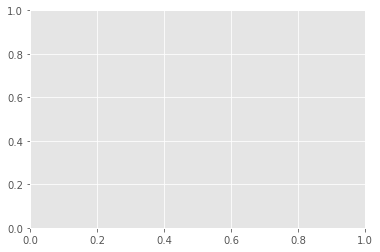

In [17]:
N = 22
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on FER Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
model.save('VGG_16_modified.h5')

In [ ]:
model.save_weights('VGG16_modified_weights.h5')

In [ ]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('VGG16_modified_model.json', 'w') as json_file:
    json_file.write(json_model)

In [ ]:
test = '../input/fer-dsc-v3/final_data_v5/final_data_v5/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory (test, batch_size=256, class_mode='categorical', target_size=(48,48))

In [ ]:
model.evaluate(test_generator, steps=4)

In [ ]:
'''import numpy as np
import files
from keras.preprocessing import image

uploaded = files.upload()

# predicting images
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(48, 48))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    print(classes)'''